<a href="https://colab.research.google.com/github/Happy-Virus-IkBeom/IT-/blob/master/B715141_%EC%9D%B4%EC%9D%B5%EB%B2%94_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 24 18:41:23 2020

@author: 이익범
"""

"""기존 NN  training"""

import tensorflow as tf
import random
# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# The file path to save the data
save_file = './model.ckpt'

tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)
# weights & bias for nn layers
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()

hypothesis = tf.matmul(L4, W5) + b5
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

saver.save(sess,save_file)

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))
import matplotlib.pyplot as plt

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [0]:

# -*- coding: utf-8 -*-
"""
Created on Fri May 29 21:01:27 2020

@author: 이익범
"""

"""기존 NN test"""
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# The file path to save the data
save_file = './model.ckpt'

tf.reset_default_graph()

tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)
# weights & bias for nn layers

W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()

hypothesis = tf.matmul(L4, W5) + b5
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# train my model


saver.restore(sess,save_file)

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))
import matplotlib.pyplot as plt

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


In [0]:
"""CNN mnist training => save parameter"""

import tensorflow as tf
import random

import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)


# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)


# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])


# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()

logits = tf.matmul(L4, W5) + b5


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy

saver.save(sess,save_file)



correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [0]:

"""CNN Original Test=> restore parameter"""
import tensorflow as tf
import random

import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)


# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()

logits = tf.matmul(L4, W5) + b5


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())


saver.restore(sess,save_file)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [0]:
"""CNN_Flipping_Test"""

import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()

logits = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())


saver.restore(sess,save_file)

X_no_flip = mnist.test.images
#X_test = np.rot90(X_no_flip,0)
X_test = np.flip(X_no_flip)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
    X: X_test, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: X_test[r:r + 1], keep_prob: 1}))

plt.imshow(X_test[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [0]:
"""Color_Flipped_Test"""

import tensorflow as tf
import random

import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()

logits = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())


saver.restore(sess,save_file)

flipped = True

if flipped:
  train_data = 1- mnist.train.images
  Color_Flipped_test = 1-  mnist.test.images
  print("Flipped Mnist")
  
else:
  print("Normal Mnist")


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: Color_Flipped_test, Y: mnist.test.labels, keep_prob: 1}))


r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: Color_Flipped_test[r:r + 1], keep_prob: 1}))

plt.imshow(Color_Flipped_test[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [0]:
"""CNN Rotated Mnist Test"""
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)


# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()
hypothesis = tf.matmul(L4, W5) + b5


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver.restore(sess,save_file)
test_load = np.loadtxt('/content/mnist_all_rotation_normalized_float_train_valid.amat')
# get train image datas
x_rotated_test = test_load[:, :-1] / 1.0

# get test image labels
y_rotated_label = test_load[:, -1:]
y_rotated_label = tf.one_hot(y_rotated_label, depth = 10).eval(session=sess)
y_rotated_label = tf.reshape(y_rotated_label,shape=[-1,10]).eval(session=sess)

'''
# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
'''
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size):
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]

        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch

    return correct_sample / N

print("\nAccuracy Evaluates") 
print("-------------------------------")
print('Train Accuracy:', evaluate(x_rotated_train, y_rotated_train_label))
print('Test Accuracy:', evaluate(x_rotated_test, y_rotated_label))


# Get one and predict
print("\nGet one and predict")
print("-------------------------------")
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(y_rotated_label[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), {X: x_rotated_test[r:r + 1], keep_prob: 1}))

plt.imshow(x_rotated_test[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning stared. It takes sometime.
Epoch: 0001 cost = 2.316545940
Epoch: 0002 cost = 1.483605135
Epoch: 0003 cost = 0.967549519
Epoch: 0004 cost = 0.691942339
Epoch: 0005 cost = 0.526397263
Epoch: 0006 cost = 0.430066845
Epoch: 0007 cost = 0.371523820
Epoch: 0008 cost = 0.331157997
Epoch: 0009 cost = 0.285715674
Epoch: 0010 cost = 0.257411384
Epoch: 0011 cost = 0.241253417
Epoch: 0012 cost = 0.214239784
Epoch: 0013 cost = 0.203717100
Epoch: 0014 cost = 0.188326071
Epoch: 0015 cost = 0.182159927
Learning Finished!

Accuracy Evaluates
-------------------------------
Train Accuracy: 0.9849166665077209
Test Accuracy: 0.9445999998474122

Get one and predict
-------------------------------
Label:  [1]
Prediction:  [1]


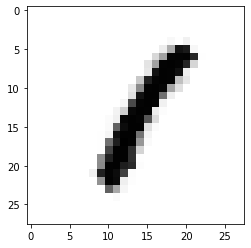

In [0]:
""" Low Memory CNN Training"""
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)


# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()
hypothesis = tf.matmul(L4, W5) + b5


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver.save(sess,save_file)


train_load = np.loadtxt('/content/mnist_all_rotation_normalized_float_train_valid.amat')
# get train image datas
x_rotated_train = train_load[:, :-1] / 1.0

# get test image labels
y_rotated_train_label = train_load[:, -1:]
y_rotated_train_label = tf.one_hot(y_rotated_train_label, depth = 10).eval(session=sess)
y_rotated_train_label = tf.reshape(y_rotated_train_label,shape=[-1,10]).eval(session=sess)

test_load = np.loadtxt('/content/mnist_all_rotation_normalized_float_test.amat')
# get train image datas
x_rotated_test = test_load[:, :-1] / 1.0

# get test image labels
y_rotated_label = test_load[:, -1:]
y_rotated_label = tf.one_hot(y_rotated_label, depth = 10).eval(session=sess)
y_rotated_label = tf.reshape(y_rotated_label,shape=[-1,10]).eval(session=sess)



# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(12000 / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = x_rotated_train[i*batch_size:i*batch_size+batch_size], y_rotated_train_label[i*batch_size:i*batch_size+batch_size]
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size):
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]

        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch

    return correct_sample / N

print("\nAccuracy Evaluates") 
print("-------------------------------")
print('Train Accuracy:', evaluate(x_rotated_train, y_rotated_train_label))
print('Test Accuracy:', evaluate(x_rotated_test, y_rotated_label))


# Get one and predict
print("\nGet one and predict")
print("-------------------------------")
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(y_rotated_label[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), {X: x_rotated_test[r:r + 1], keep_prob: 1}))

plt.imshow(x_rotated_test[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning stared. It takes sometime.
Epoch: 0001 cost = 2.141331415
Epoch: 0002 cost = 1.273232954
Epoch: 0003 cost = 0.827079914
Epoch: 0004 cost = 0.610492926
Epoch: 0005 cost = 0.486787662
Epoch: 0006 cost = 0.395377245
Epoch: 0007 cost = 0.354978230
Epoch: 0008 cost = 0.310993304
Epoch: 0009 cost = 0.285303826
Epoch: 0010 cost = 0.260849673
Epoch: 0011 cost = 0.243419752
Epoch: 0012 cost = 0.217051770
Epoch: 0013 cost = 0.214562067
Epoch: 0014 cost = 0.194597153
Epoch: 0015 cost = 0.179437068
Learning Finished!

Accuracy Evaluates
-------------------------------
Train Accuracy: 0.9859166665077209
Test Accuracy: 0.9465400001907348

Get one and predict
-------------------------------
Label:  [8]
Prediction:  [8]


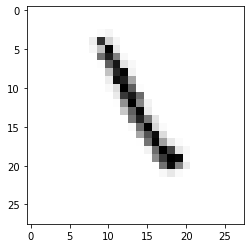

In [0]:
""" Low Memory CNN Training, Flipping Training, test"""
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)


# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()
hypothesis = tf.matmul(L4, W5) + b5


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver.save(sess,save_file)

train_load = np.loadtxt('/content/mnist_all_rotation_normalized_float_train_valid.amat')
# get train image datas
x_rotated_train = train_load[:, :-1] / 1.0
x_rotated_flipped_train = np.flip(x_rotated_train )
# get test image labels
y_rotated_train_label = train_load[:, -1:]
y_rotated_train_label = tf.one_hot(y_rotated_train_label, depth = 10).eval(session=sess)
y_rotated_flipped_train_label = tf.reshape(y_rotated_train_label,shape=[-1,10]).eval(session=sess)
y_rotated_flipped_train_label = np.flip(y_rotated_flipped_train_label )
test_load = np.loadtxt('/content/mnist_all_rotation_normalized_float_test.amat')
# get train image datas
x_rotated_test = test_load[:, :-1] / 1.0
x_rotated_flipped_test = np.flip(x_rotated_test)
# get test image labels
y_rotated_label = test_load[:, -1:]
y_rotated_label = tf.one_hot(y_rotated_label, depth = 10).eval(session=sess)
y_rotated_flipped_test_label = tf.reshape(y_rotated_label,shape=[-1,10]).eval(session=sess)
y_rotated_flipped_test_label = np.flip(y_rotated_flipped_test_label)
# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(12000 / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = x_rotated_flipped_train[i*batch_size:i*batch_size+batch_size], y_rotated_flipped_train_label[i*batch_size:i*batch_size+batch_size]
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size):
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]

        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch

    return correct_sample / N

print("\nAccuracy Evaluates") 
print("-------------------------------")
print('Train Accuracy:', evaluate(x_rotated_flipped_train, y_rotated_flipped_train_label))
print('Test Accuracy:', evaluate(x_rotated_flipped_test, y_rotated_flipped_test_label))


# Get one and predict
print("\nGet one and predict")
print("-------------------------------")
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(y_rotated_flipped_test_label[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), {X: x_rotated_flipped_test[r:r + 1], keep_prob: 1}))

plt.imshow(x_rotated_flipped_test[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest') 
plt.show()


In [40]:
"""Rotation (including Flipping) + Scaling Training & Testing Validation Code"""
from __future__ import absolute_import

from __future__ import print_function

from __future__ import division



import gzip

import os

import numpy as np

import tensorflow as tf

import time

import csv

from scipy import ndimage

from six.moves import urllib

from PIL import Image

from scipy.misc import imsave

import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

URL = 'http://yann.lecun.com/exdb/mnist/'

expanded_images = []

expanded_labels = []

DATA_DIRECTORY = "data"

VALIDATION_SIZE = 5000  # Size of the validation set.


def download(filename):

    #Check if directory exists

    if not tf.gfile.Exists(DATA_DIRECTORY):

        tf.gfile.MakeDirs(DATA_DIRECTORY)

    filepath = os.path.join(DATA_DIRECTORY, filename)

    #Check if file exists, if not download

    if not tf.gfile.Exists(filepath):

        filepath, _ = urllib.request.urlretrieve(URL + filename, filepath)

        with tf.gfile.GFile(filepath) as f:

            size = f.size()

        print('Successfully downloaded', filename, size, 'bytes.')

    return filepath


def extract_data(filename, num):

    print('Extracting', filename)

    #unzip data

    with gzip.open(filename) as bytestream:

        bytestream.read(16)

        buf = bytestream.read(28 * 28 * num * 1)

        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

        data = (data - (255 / 2.0)) / 255 #rescaling value to [-0.5,0.5]

        data = data.reshape(num, 28, 28, 1) #reshape into tensor

        data = np.reshape(data, [num, -1])

    return data



def extract_labels(filename, num):

    print('Extracting', filename)

    with gzip.open(filename) as bytestream:

        bytestream.read(8)

        buf = bytestream.read(1 * num)

        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

        num_labels_data = len(labels)

        one_hot_encoding = np.zeros((num_labels_data,10))

        one_hot_encoding[np.arange(num_labels_data),labels] = 1

        one_hot_encoding = np.reshape(one_hot_encoding, [-1, 10])

    return one_hot_encoding



def expand_training_data(images, labels):



    global expanded_images

    global expanded_labels

    directory = os.path.dirname("data/New")

    if not tf.gfile.Exists("data/New"):

        tf.gfile.MakeDirs("data/New")

    k = 0 # counter

    for x, y in zip(images, labels):

        k = k+1

        if k%100==0:

            print ('expanding data : %03d / %03d' % (k,np.size(images,0)))



        # register original data

        expanded_images.append(x)

        expanded_labels.append(y)



        bg_value = -0.5 # this is regarded as background's value black



        image = np.reshape(x, (-1, 28))

        for i in range(4):

            # rotate the image with random degree

            angle = np.random.randint(-90,90,1)

            new_img = ndimage.rotate(image,angle,reshape=False, cval=bg_value)



            # shift the image with random distance

            shift = np.random.randint(-2, 2, 2)

            new_img_ = ndimage.shift(new_img,shift, cval=bg_value)



            #code for saving some of these for visualization purpose only

            image1 = (image*255) + (255 / 2.0)

            new_img1 = (new_img_*255) + (255 / 2.0)

            # register new training data



            expanded_images.append(np.reshape(new_img_, 784))

            expanded_labels.append(y)





    # images and labels are concatenated for random-shuffle at each epoch

    # notice that pair of image and label should not be broken

    expanded_train_total_data = np.concatenate((expanded_images, expanded_labels), axis=1)

    np.random.shuffle(expanded_train_total_data)



    return expanded_train_total_data




def prepare_MNIST_data(use_data_augmentation=True):

    # Get the data.

    train_data_filename = download('train-images-idx3-ubyte.gz')

    train_labels_filename = download('train-labels-idx1-ubyte.gz')

    test_data_filename = download('t10k-images-idx3-ubyte.gz')

    test_labels_filename = download('t10k-labels-idx1-ubyte.gz')



    # Extract it into numpy arrays.

    train_data = extract_data(train_data_filename, 60000)

    train_labels = extract_labels(train_labels_filename, 60000)

    test_data = extract_data(test_data_filename, 10000)

    test_labels = extract_labels(test_labels_filename, 10000)

    # Generate a validation set.

    print(train_data.shape)

    validation_data = train_data[:VALIDATION_SIZE, :]

    validation_labels = train_labels[:VALIDATION_SIZE,:]

    train_data = train_data[VALIDATION_SIZE:, :]

    train_labels = train_labels[VALIDATION_SIZE:,:]



    # Concatenate train_data & train_labels for random shuffle

    if use_data_augmentation:

        train_total_data = expand_training_data(train_data, train_labels)

    else:

        train_total_data = np.concatenate((train_data, train_labels), axis=1)



    train_size = train_total_data.shape[0]



    return train_total_data, train_size, validation_data, validation_labels, test_data, test_labels

train_total_data, train_size, validation_data, validation_labels, test_data, test_labels = prepare_MNIST_data(True)

X_train = expanded_images
Y_Train_label = expanded_labels
X_test = test_data
Y_test_label = test_labels


save_file = './model.ckpt'
tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# hyper parameters
learning_rate = 0.001
training_epochs = 5
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)


# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))

saver = tf.train.Saver()
hypothesis = tf.matmul(L4, W5) + b5


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#saver.save(sess,save_file)
saver.restore(sess,save_file)


# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(train_size / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = X_train[i*batch_size:i*batch_size+batch_size], Y_Train_label[i*batch_size:i*batch_size+batch_size]
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size):
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]

        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch

    return correct_sample / N

print("\nAccuracy Evaluates") 
print("-------------------------------")
print('Train Accuracy:', evaluate(X_train, Y_Train_label))
print('Test Accuracy:', evaluate(X_test, Y_test_label))


# Get one and predict
print("\nGet one and predict")
print("-------------------------------")
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(Y_test_label[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), {X: X_test[r:r + 1], keep_prob: 1}))

plt.imshow(X_test[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
(60000, 784)
expanding data : 100 / 55000
expanding data : 200 / 55000
expanding data : 300 / 55000
expanding data : 400 / 55000
expanding data : 500 / 55000
expanding data : 600 / 55000
expanding data : 700 / 55000
expanding data : 800 / 55000
expanding data : 900 / 55000
expanding data : 1000 / 55000
expanding data : 1100 / 55000
expanding data : 1200 / 55000
expanding data : 1300 / 55000
expanding data : 1400 / 55000
expanding data : 1500 / 55000
expanding data : 1600 / 55000
expanding data : 1700 / 55000
expanding data : 1800 / 55000
expanding data : 1900 / 55000
expanding data : 2000 / 55000
expanding data : 2100 / 55000
expanding data : 2200 / 55000
expanding data : 2300 / 55000
expanding data : 2400 / 55000
expanding data : 2500 / 55000
expanding data : 2600 / 55000
expanding data : 2700 / 55000
expanding data :

AttributeError: ignored

In [0]:
pip list 

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   1.5.0          
blis                     0.4.1          
bokeh                    1.4.0          
boto                     2.49.0         
boto3                    1.13.13        
botocore                 1.16.13        
Bottleneck      